In [1]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [2]:
%cd /content/drive/MyDrive/ERA/ERA_S5

/content/drive/MyDrive/ERA/ERA_S5


In [3]:
!pip install matplotlib torchsummary

In [4]:
import model
from model import Net
import utils
from utils import Utils

In [5]:
utility = Utils()

In [6]:
# Train data transformations
train_transforms, test_transforms = utility.get_transform()

In [7]:
train_data, test_data = utility.get_data(train_transforms, test_transforms)

In [8]:
train_loader, test_loader = utility.get_data_loader(train_data, test_data)

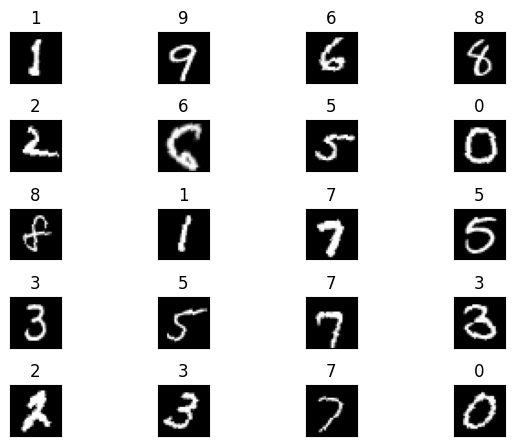

In [9]:
utility.plot_input_data(train_loader, 20)

In [10]:
model = Net().to(utility.device) # Load model to device

In [11]:
model_summary = utility.get_model_summary(model)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 26, 26]             320
            Conv2d-2           [-1, 64, 24, 24]          18,496
            Conv2d-3          [-1, 128, 10, 10]          73,856
            Conv2d-4            [-1, 256, 8, 8]         295,168
            Linear-5                   [-1, 50]         204,850
            Linear-6                   [-1, 10]             510
Total params: 593,200
Trainable params: 593,200
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.67
Params size (MB): 2.26
Estimated Total Size (MB): 2.94
----------------------------------------------------------------


In [ ]:
optimizer = utility.get_optimizer(model)
scheduler = utility.get_scheduler(optimizer)

criterion = utility.criterion # negetive loss likelihood loss
num_epochs = utility.num_epochs

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  utility.train(model, utility.device, train_loader, optimizer, criterion) # Train th models
  utility.test(model, utility.device, test_loader, criterion) # Tets the model
  scheduler.step() # update hte learning rate

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 1


Train: Loss=2.2587 Batch_id=117 Accuracy=12.98: 100%|██████████| 118/118 [00:21<00:00,  5.59it/s]


Test set: Average loss: 2.2526, Accuracy: 2596/10000 (25.96%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 2


Train: Loss=0.7591 Batch_id=117 Accuracy=50.79: 100%|██████████| 118/118 [00:20<00:00,  5.77it/s]


Test set: Average loss: 0.7382, Accuracy: 7774/10000 (77.74%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 3


Train: Loss=0.4068 Batch_id=117 Accuracy=81.91: 100%|██████████| 118/118 [00:20<00:00,  5.77it/s]


Test set: Average loss: 0.4082, Accuracy: 8679/10000 (86.79%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 4


Train: Loss=0.3650 Batch_id=117 Accuracy=87.00: 100%|██████████| 118/118 [00:21<00:00,  5.39it/s]


Test set: Average loss: 0.2775, Accuracy: 9183/10000 (91.83%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 5


Train: Loss=0.3182 Batch_id=117 Accuracy=89.78: 100%|██████████| 118/118 [00:21<00:00,  5.50it/s]


Test set: Average loss: 0.2149, Accuracy: 9363/10000 (93.63%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 6


Train: Loss=0.2677 Batch_id=117 Accuracy=92.02: 100%|██████████| 118/118 [00:22<00:00,  5.34it/s]


Test set: Average loss: 0.1633, Accuracy: 9543/10000 (95.43%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 7


Train: Loss=0.1499 Batch_id=117 Accuracy=93.27: 100%|██████████| 118/118 [00:21<00:00,  5.39it/s]


Test set: Average loss: 0.1453, Accuracy: 9562/10000 (95.62%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 8


Train: Loss=0.1620 Batch_id=117 Accuracy=94.32: 100%|██████████| 118/118 [00:21<00:00,  5.42it/s]


Test set: Average loss: 0.1363, Accuracy: 9596/10000 (95.96%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 9


Train: Loss=0.3126 Batch_id=117 Accuracy=94.84: 100%|██████████| 118/118 [00:20<00:00,  5.77it/s]


Test set: Average loss: 0.1052, Accuracy: 9699/10000 (96.99%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 10


Train: Loss=0.0747 Batch_id=117 Accuracy=95.44: 100%|██████████| 118/118 [00:20<00:00,  5.73it/s]


Test set: Average loss: 0.1022, Accuracy: 9679/10000 (96.79%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 11


Train: Loss=0.1685 Batch_id=117 Accuracy=95.79: 100%|██████████| 118/118 [00:22<00:00,  5.36it/s]


Test set: Average loss: 0.0863, Accuracy: 9746/10000 (97.46%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 12


Train: Loss=0.0764 Batch_id=117 Accuracy=96.10: 100%|██████████| 118/118 [00:21<00:00,  5.41it/s]


Test set: Average loss: 0.0824, Accuracy: 9770/10000 (97.70%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 13


Train: Loss=0.1729 Batch_id=117 Accuracy=96.31: 100%|██████████| 118/118 [00:20<00:00,  5.79it/s]


Test set: Average loss: 0.0789, Accuracy: 9766/10000 (97.66%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 14


Train: Loss=0.1034 Batch_id=117 Accuracy=96.53: 100%|██████████| 118/118 [00:21<00:00,  5.55it/s]


Test set: Average loss: 0.0669, Accuracy: 9797/10000 (97.97%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 15


Train: Loss=0.0766 Batch_id=117 Accuracy=96.71: 100%|██████████| 118/118 [00:21<00:00,  5.47it/s]


Test set: Average loss: 0.0683, Accuracy: 9796/10000 (97.96%)

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch 16


Train: Loss=0.0980 Batch_id=117 Accuracy=97.02: 100%|██████████| 118/118 [00:20<00:00,  5.66it/s]


Test set: Average loss: 0.0618, Accuracy: 9808/10000 (98.08%)

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch 17


Train: Loss=0.1278 Batch_id=117 Accuracy=97.07: 100%|██████████| 118/118 [00:21<00:00,  5.47it/s]


Test set: Average loss: 0.0609, Accuracy: 9820/10000 (98.20%)

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch 18


Train: Loss=0.0298 Batch_id=117 Accuracy=97.14: 100%|██████████| 118/118 [00:21<00:00,  5.52it/s]


Test set: Average loss: 0.0603, Accuracy: 9818/10000 (98.18%)

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch 19


Train: Loss=0.1006 Batch_id=5 Accuracy=96.84:   4%|▍         | 5/118 [00:01<00:22,  4.98it/s]

In [1]:
utility.plot_learning_curve()

NameError: name 'utility' is not defined